In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import numpy as np
import scipy.stats as st
import pandas as pd
import random

Simulación de la Martingala. Asuma que se desea jugar a la ruleta dentro de un casino siguiendo la estrategia de apuesta Martingala apostando consistentemente a una de dos opciones, donde dichas opciones obedecen a $\textit{negro o rojo}$ y cuentan con la misma probabilidad. A continuaciónn considere los siguientes escenarios,


1.   (a) Suponga que cuenta con 10 dólares para apostar y se parará el juego cuando se quede sin dinero o cuando apueste 20 veces (de acuerdo a las po
2.   b) Suponga que cuenta con la misma cantidad de dólares para apostar y suponga además queno existe topes del casino respecto al número de apuestas. En este caso el juego se detendrá cuando se quede sin dinero dada su adicción por las apuestas.
3.   (c) Suponga que cuenta con los mismos 10 dólares para apostar y se parará el juego cuando se quede sin dinero o cuando apueste 40 veces (primer escenario - apuestas en semana) y 80 veces (segundo escenario - apuestas de fines de semana) (de acuerdo a las pol´ıticas del casino).

Para cada caso desarrolle una simulación que se repita 200 veces y proceda a identificar las $\textbf{propiedades distribucionales}$ para la ganancia final y el número de apuestas. Realice una representación gráfica de al menos 1 de las 200 repeticiones para cada caso. Adicionalmente compare
analíticamente los resultados obtenidos en los 3 casos.


In [39]:
numero_repeticiones=200

In [40]:
def martingale(dinero_inicial,probabilidad_a,numero_simulaciones,escenario):
  #escenario (a), (b) y (c)
  perdida=0
  ganancia=0
  dineroTotal= dinero_inicial 

  numeroApuestas=0
  dineroApostado=0
  listaDineroT=[dinero_inicial]
  listaNumeroApuestas=[numeroApuestas]


  if escenario== 'a' or escenario=='c':
    while dineroTotal>0 and numeroApuestas<numero_simulaciones:
      numeroApuestas+=1
      listaNumeroApuestas.append(numeroApuestas)
      dineroApostado=1
      dineroTotal-= dineroApostado
      probabilidad= random.uniform(0, 1)
      while probabilidad>probabilidad_a and numeroApuestas<numero_simulaciones:
        listaDineroT.append(dineroTotal)
        perdida+= dineroApostado
        dineroApostado= dineroApostado*2
        if dineroTotal-dineroApostado<0:
          return dineroTotal, listaNumeroApuestas, listaDineroT
        dineroTotal-= dineroApostado
        numeroApuestas+=1
        listaNumeroApuestas.append(numeroApuestas)
        probabilidad= random.uniform(0, 1)
      ganancia= dineroApostado-perdida
      dineroTotal+= dineroApostado+ganancia
      listaDineroT.append(dineroTotal)
      perdida=0
      dineroApostado=1

  elif escenario == 'b':
    while dineroTotal>0:
      numeroApuestas+=1
      listaNumeroApuestas.append(numeroApuestas)
      dineroApostado=1
      dineroTotal-= dineroApostado
      probabilidad= random.uniform(0, 1)
      while probabilidad>probabilidad_a:
        listaDineroT.append(dineroTotal)
        perdida+= dineroApostado
        dineroApostado= dineroApostado*2
        if dineroTotal-dineroApostado<0:
          return dineroTotal, listaNumeroApuestas, listaDineroT
        dineroTotal-= dineroApostado
        numeroApuestas+=1
        listaNumeroApuestas.append(numeroApuestas)
        probabilidad= random.uniform(0, 1)
      ganancia= dineroApostado-perdida
      dineroTotal+= dineroApostado+ganancia
      listaDineroT.append(dineroTotal)
      perdida=0
      dineroApostado=1

  return dineroTotal,listaNumeroApuestas, listaDineroT

>Procedemos a calcular el primer escenario, donde contamos con un dinero inicial de 10 dólares y un máximo de apuestas de 20

Promedio Ganancia final en 200 repeticiones es de  6.02
Promedio Total apuestas final en 200 repeticiones es de  11.265


Text(0.5, 1.0, 'Histograma Total apuestas Final en 200 repeticiones')

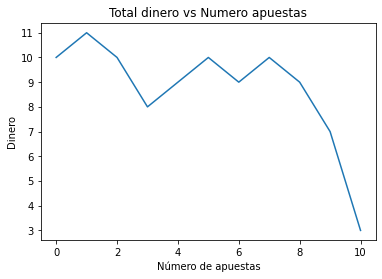

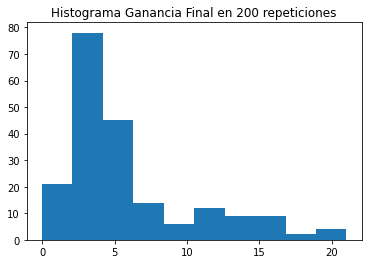

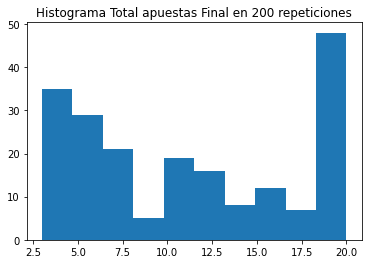

In [41]:
#Escenario (a)

dineroTotal=[]
totalApuestas=[]
for i in range(numero_repeticiones):
  a,b,c= martingale(10,0.5,20,'a') 
  dineroTotal.append(a)
  totalApuestas.append(b[-1])


print('Promedio Ganancia final en', numero_repeticiones, 'repeticiones es de ', np.mean(dineroTotal))
print('Promedio Total apuestas final en', numero_repeticiones, 'repeticiones es de ', np.mean(totalApuestas))
  
fig9 = plt.figure()
plt.plot(b,c)
plt.title('Total dinero vs Numero apuestas')
plt.ylabel('Dinero')
plt.xlabel('Número de apuestas')

fig10 = plt.figure()
plt.hist(dineroTotal)
plt.title('Histograma Ganancia Final en 200 repeticiones')

fig17= plt.figure()
plt.hist(totalApuestas)
plt.title('Histograma Total apuestas Final en 200 repeticiones')

>De los resultados anteriores podemos observar el promedio de la ganancia final y el número de puestas final de las 200 repeticiones, también vemos en la primer figura un ejemplo en particular de las 200 repeticiones, donde se grafica El dinero total en cada apuesta. Ademas se muestran los histogramas que muestran la ganancia final y el total de apuestas. 

> También vemos en este escenario que el Promedio de la Ganancia final en 200 repeticiones es de  6.02 y el Promedio Total apuestas final en 200 repeticiones es de  11.26

$\textbf{Escenario b}$ Contamos con un dinero inicial de 10 dólares y sin restricción en el número de apuestas

Promedio Ganancia final en 200 repeticiones es de  3.695
Promedio Total apuestas final en 200 repeticiones es de  16.33


Text(0.5, 1.0, 'Histograma Total apuestas Final en 200 repeticiones')

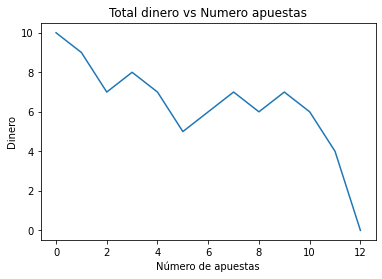

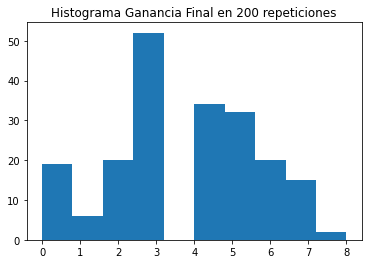

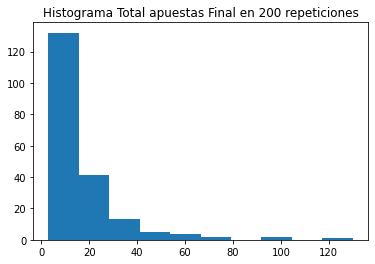

In [42]:
#Escenario b
dineroTotal_b=[]
tApuestas=[]
for i in range(200):
  a,b,c= martingale(10,0.5,20,'b') 
  dineroTotal_b.append(a)
  tApuestas.append(b[-1])

print('Promedio Ganancia final en', numero_repeticiones, 'repeticiones es de ', np.mean(dineroTotal_b))
print('Promedio Total apuestas final en', numero_repeticiones, 'repeticiones es de ', np.mean(tApuestas))

fig11 = plt.figure()
plt.plot(b,c)
plt.title('Total dinero vs Numero apuestas')
plt.ylabel('Dinero')
plt.xlabel('Número de apuestas')

fig12 = plt.figure()
plt.hist(dineroTotal_b)
plt.title('Histograma Ganancia Final en 200 repeticiones')

fig16= plt.figure()
plt.hist(tApuestas)
plt.title('Histograma Total apuestas Final en 200 repeticiones')

>Podemos observar que hay claras diferencias entre este escenario y el anterior. Uno de ellos es que observamos que hay un mayor número de clases en el histograma de total apuestas, esto debido a la adicción al juego, ya que no contamos una restricción respecto al total de apuestas.

>También vemos que el Promedio Ganancia final en 200 repeticiones es de  3.69 (el cual es más bajo que en el escenario anterior) y el Promedio Total apuestas final en 200 repeticiones es de  16.33 (que es un poco más alto que el escenario anterior, esto debido a la adicción al juego)

Promedio Ganancia final en semana en  200 repeticiones es de  4.19
Promedio Total apuestas final en semana en 200 repeticiones es de  14.15
Promedio Ganancia final en fin de semana en 200 repeticiones es de  3.66
Promedio Total apuestas final en fin de semana en 200 repeticiones es de  15.175


Text(0.5, 1.0, 'Histograma Total apuestas Final en 200 repeticiones')

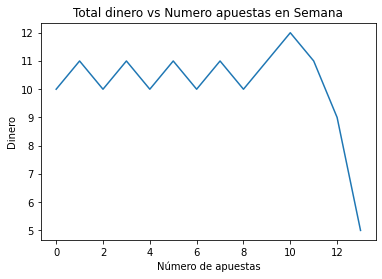

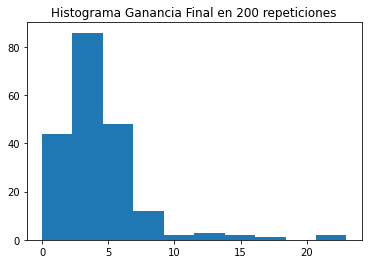

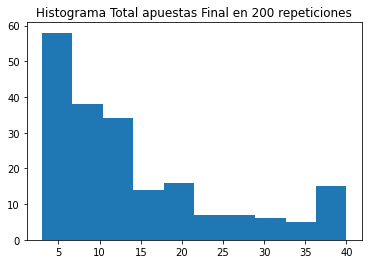

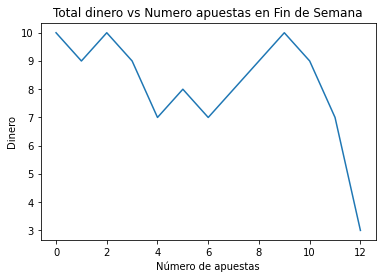

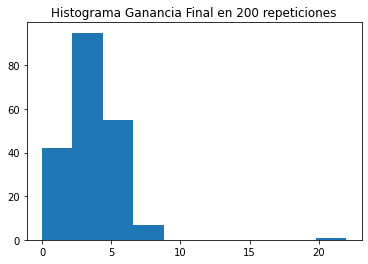

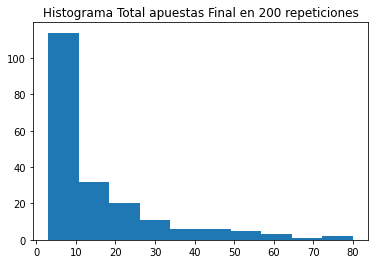

In [43]:
#Escenario (c)

#Apuestas en semana
dineroTotal_c_semana=[]
tApuestas_semana=[]
for i in range(200):
  a,b,c= martingale(10,0.5,40,'c') 
  dineroTotal_c_semana.append(a)
  tApuestas_semana.append(b[-1])


print('Promedio Ganancia final en semana en ', numero_repeticiones, 'repeticiones es de ', np.mean(dineroTotal_c_semana))
print('Promedio Total apuestas final en semana en', numero_repeticiones, 'repeticiones es de ', np.mean(tApuestas_semana))

fig13 = plt.figure()
plt.plot(b,c)
plt.title('Total dinero vs Numero apuestas en Semana')
plt.ylabel('Dinero')
plt.xlabel('Número de apuestas')

fig14 = plt.figure()
plt.hist(dineroTotal_c_semana)
plt.title('Histograma Ganancia Final en 200 repeticiones')

fig19= plt.figure()
plt.hist(tApuestas_semana)
plt.title('Histograma Total apuestas Final en 200 repeticiones')

#Apuestas fines de semana
dineroTotal_c_finsemana=[]
tApuestas_finde=[]
for i in range(200):
  a,b,c= martingale(10,0.5,80,'c') 
  dineroTotal_c_finsemana.append(a)
  tApuestas_finde.append(b[-1])

print('Promedio Ganancia final en fin de semana en', numero_repeticiones, 'repeticiones es de ', np.mean(dineroTotal_c_finsemana))
print('Promedio Total apuestas final en fin de semana en', numero_repeticiones, 'repeticiones es de ', np.mean(tApuestas_finde))

fig15 = plt.figure()
plt.plot(b,c)
plt.title('Total dinero vs Numero apuestas en Fin de Semana')
plt.ylabel('Dinero')
plt.xlabel('Número de apuestas')

fig16 = plt.figure()
plt.hist(dineroTotal_c_finsemana)
plt.title('Histograma Ganancia Final en 200 repeticiones')

fig20= plt.figure()
plt.hist(tApuestas_finde)
plt.title('Histograma Total apuestas Final en 200 repeticiones')


>De los anteriores resultados, evidenciamos que en los histogramas de la ganancia final, las clases tienden a concentrarse todas en la parte izquierda. Esto puede ser ocasionado ya que contamos con una restricción de número de apuestas muy alta, ocasionando que al retirarse del juego el capital final sea algo bajo.  

>Otra conclusión a destacar en ambos escenarios es que el promedio de ganancia final en las 200 repeticiones es muy parecido, al igual que el promedio del total de apuesta.